In [2]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [79]:
simulated_data = pd.read_csv('MAR_FINAL_HEAD.csv').iloc[:,1:]
time_steps = pd.read_csv('time_steps.csv').iloc[:,-1].values
aq_top = pd.read_csv('aq_top.csv')
sub_grids =pd.read_csv('MAR_wells_2.csv')

In [225]:
simulated_data.head()

,CellID,RechID,0,1,2,3,4,5,6,7,...,67,68,69,70,71,72,73,74,75,76
0,2723,0,167.345596,167.399460,167.449951,167.497391,167.542038,167.584122,167.623871,167.661499,...,168.044144,168.076492,168.114410,167.939484,167.925934,167.972748,168.021240,167.922928,167.837570,167.851822
1,2723,1,167.389465,167.483810,167.571747,167.653854,167.730667,167.802658,167.870209,167.933731,...,168.681366,168.755920,168.851730,168.592468,168.579956,168.667404,168.766540,168.617523,168.495193,168.542129
2,2723,2,167.477219,167.652481,167.815262,167.966690,168.107712,168.239258,168.362152,168.477158,...,169.836304,170.025162,170.429886,169.800034,169.825333,170.006027,170.324310,169.936951,169.765015,169.884338
3,2723,3,167.652710,167.989716,168.301880,168.591415,168.860290,169.110306,169.343140,169.560226,...,172.814499,173.677246,174.121597,172.461700,172.977386,173.733933,174.073654,172.978592,172.660629,173.380432
4,2723,4,168.003571,168.663498,169.273514,169.837906,171.930100,174.800522,176.025665,176.625076,...,179.714432,181.594635,182.857025,179.176514,180.141861,181.860168,182.871094,180.350891,179.540161,181.145493


In [229]:
sub_grids[sub_grids['Cell_ID']==2723]['Subbasin'].values[0]

2

In [232]:
# variables
cellid = list(simulated_data['CellID'].unique())
Recharge_rates = np.array([500,1000,2000,4000,8000,16000])

PARC_ts = []
for cid in cellid:
    print(f'Parc calculation for Cellid: {cid}')
    try:
        sub = sub_grids[sub_grids['Cell_ID']==cid]['Subbasin'].values[0]
    except IndexError as e:
        sub = 0
    
    temp_hts = simulated_data[simulated_data['CellID']==cid].iloc[:6,:]
    hper = aq_top[aq_top['cellid']==cid].iloc[:,-3].values[0] - 3
    
    Parc_temp = [cid,sub]
    for tend in range(len(time_steps)):
        ti = np.arange(0, tend+1)

        Qs = []
        for t in ti:

            head = temp_hts.iloc[:,t+2].values
            slope, intercept, r_value, p_value, std_err = linregress(head, Recharge_rates)
            prediction = slope * hper + intercept
            Qs.append(prediction)
        
        Parc_temp.append(min(Qs))
    PARC_ts.append(Parc_temp)

p_names = ['PARC_'+str(t) for t in time_steps]
PARC_df = pd.DataFrame(data = PARC_ts, columns= ['CellID','SUB']+p_names)
PARC_df.to_csv('PARC_wrt_tend.csv')
        

Parc calculation for Cellid: 2723
Parc calculation for Cellid: 2898
Parc calculation for Cellid: 2728
Parc calculation for Cellid: 2074
Parc calculation for Cellid: 3062
Parc calculation for Cellid: 1744
Parc calculation for Cellid: 3554
Parc calculation for Cellid: 1747
Parc calculation for Cellid: 2237
Parc calculation for Cellid: 1422
Parc calculation for Cellid: 2410
Parc calculation for Cellid: 1592
Parc calculation for Cellid: 1088
Parc calculation for Cellid: 776
Parc calculation for Cellid: 2084
Parc calculation for Cellid: 3555
Parc calculation for Cellid: 1262
Parc calculation for Cellid: 769
Parc calculation for Cellid: 1105
Parc calculation for Cellid: 2738
Parc calculation for Cellid: 1275
Parc calculation for Cellid: 1599
Parc calculation for Cellid: 2579
Parc calculation for Cellid: 3402
Parc calculation for Cellid: 2752
Parc calculation for Cellid: 4063
Parc calculation for Cellid: 1936
Parc calculation for Cellid: 3409
Parc calculation for Cellid: 3406
Parc calculation

In [135]:
# monthly parc for scheduling
cellid = list(simulated_data['CellID'].unique())
Recharge_rates = np.array([500,1000,2000,4000,8000,16000])

PARC_ts = []
for cid in cellid:
    print(f'Parc calculation for Cellid: {cid}')
    temp_hts = simulated_data[simulated_data['CellID']==cid].iloc[:6,:]
    hper = aq_top[aq_top['cellid']==cid].iloc[:,-3].values[0] - 3
    
    Parc_temp = [cid]

    for t in range(len(time_steps)):

        head = temp_hts.iloc[:,t+2].values
        slope, intercept, r_value, p_value, std_err = linregress(head, Recharge_rates)
        prediction = slope * hper + intercept
        Parc_temp.append(prediction)

    PARC_ts.append(Parc_temp)

p_names = ['PARC_'+str(t) for t in time_steps]
PARC_df2 = pd.DataFrame(data = PARC_ts, columns= ['CellID']+p_names)
PARC_df2.to_csv('PARC_wrt_tend_stepped_for_sheduling.csv')

Parc calculation for Cellid: 2723
Parc calculation for Cellid: 2898
Parc calculation for Cellid: 2728
Parc calculation for Cellid: 2074
Parc calculation for Cellid: 3062
Parc calculation for Cellid: 1744
Parc calculation for Cellid: 3554
Parc calculation for Cellid: 1747
Parc calculation for Cellid: 2237
Parc calculation for Cellid: 1422
Parc calculation for Cellid: 2410
Parc calculation for Cellid: 1592
Parc calculation for Cellid: 1088
Parc calculation for Cellid: 776
Parc calculation for Cellid: 2084
Parc calculation for Cellid: 3555
Parc calculation for Cellid: 1262
Parc calculation for Cellid: 769
Parc calculation for Cellid: 1105
Parc calculation for Cellid: 2738
Parc calculation for Cellid: 1275
Parc calculation for Cellid: 1599
Parc calculation for Cellid: 2579
Parc calculation for Cellid: 3402
Parc calculation for Cellid: 2752
Parc calculation for Cellid: 4063
Parc calculation for Cellid: 1936
Parc calculation for Cellid: 3409
Parc calculation for Cellid: 3406
Parc calculation

In [136]:
PARC_df2

,CellID,PARC_0,PARC_12,PARC_24,PARC_36,PARC_48,PARC_60,PARC_72,PARC_84,PARC_96,...,PARC_5406,PARC_5467,PARC_5587,PARC_5679,PARC_5771,PARC_5832,PARC_5952,PARC_6044,PARC_6136,PARC_6197
0,2723,-1948.579389,-1097.910079,1751.436785,1893.391716,1516.022208,1092.640588,935.339250,859.191406,815.073289,...,521.781539,485.783105,496.733125,617.449502,554.296436,529.604197,546.253166,637.259597,617.746088,578.039340
1,2898,61431.004320,31983.876503,22178.870435,17289.891568,14370.955257,12436.690973,11063.547332,9160.787648,6837.775077,...,3547.913806,3449.778612,3472.410186,3742.631308,3665.603812,3571.140574,3593.821418,3777.671087,3849.592851,3750.494451
2,2728,17518.126644,10337.884117,7939.230593,6737.639037,4445.350503,4055.637738,3915.478440,3838.681516,3785.082720,...,2070.834717,2046.495252,2443.868712,2515.708659,2190.481893,2175.089017,2544.189344,2564.173405,2322.083315,2314.447179
3,2074,701927.133463,675935.353356,674232.432693,674051.600536,673954.253987,673942.913362,673947.748020,673952.009280,673955.850210,...,681249.328647,692899.305566,697520.055106,693238.931607,651432.633303,688703.544270,691776.402012,687559.710481,596460.823085,698826.080702
4,3062,26967.755887,14029.490466,9728.131322,7585.078158,4823.314158,4012.783066,3731.873593,3557.534051,3422.201068,...,1664.893197,1611.954797,1672.836458,1858.948997,1797.334189,1745.215423,1796.902920,1928.963328,1969.406349,1906.519270


In [63]:
## plotdata
zones = pd.read_csv('Zone_ids.csv')
data = []
for cellid in PARC_df.iloc[:,0].values[1:]:
    for t_end in PARC_df.columns[1:]:
        data.append([cellid, int(str(t_end).split('_')[-1]), abs(PARC_df[PARC_df['CellID']==cellid][t_end].values[0]/1e6), zones[zones['cellid']==cellid].iloc[0,-1]])
plot_data = pd.DataFrame(data, columns=['cellid', 'Tend','PARC', 'Aquifer Type'])


In [54]:
plot_data.head()

,cellid,Tend,PARC,Aquifer Type
0,2898,0,0.061431,Alluvium
1,2898,12,0.031984,Alluvium
2,2898,24,0.022179,Alluvium
3,2898,36,0.017290,Alluvium
4,2898,48,0.014371,Alluvium


c:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


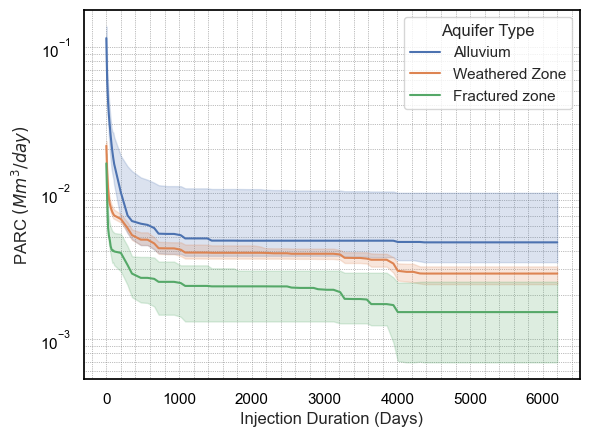

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
sns.lineplot(plot_data, x = 'Tend', y = 'PARC', hue='Aquifer Type',estimator="median",n_boot=5000, seed=10)
# plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
# plt.xlim(0, 6197)
plt.minorticks_on()
plt.grid(which='both', linestyle=':', linewidth='0.5', color='gray')
# Customize border color and tick marks
border_color = 'black'
plt.gca().spines['top'].set_color(border_color)
plt.gca().spines['right'].set_color(border_color)
plt.gca().spines['bottom'].set_color(border_color)
plt.gca().spines['left'].set_color(border_color)

plt.tick_params(axis='both', colors=border_color, direction='out', length=6)

plt.xlabel('Injection Duration (Days)')
plt.ylabel('PARC $(Mm^3/day)$')
plt.savefig('PARC_ALL_confidence_median_values.png', format = 'png', dpi = 1000)

plt.show()

## recharge Rates and injected volume

In [1]:
# injection shedule
# swat streamflow
import pandas as pd
import numpy as np
sub_grids =pd.read_csv('MAR_wells_2.csv')
hru_data = pd.read_csv('hru.csv')
excess_runoff_threshold = pd.read_csv('25perdependabl_runoff.csv')
PARC_df2 = pd.read_csv('PARC_wrt_tend_stepped_for_sheduling.csv')

In [ ]:
q_all = {}
q_shdl = {}
q_excess = {}
for i, sub in enumerate(sub_grids['Subbasin']):
    cell = sub_grids.iloc[i,-1]
    runoff_ts = hru_data[hru_data['SUB']==sub].iloc[:,-3].values
    swat_ts = hru_data[hru_data['SUB']==sub].iloc[:,-1].values
    swat_ts2d = swat_ts.reshape(int(len(swat_ts)/12), 12)
    
    try:

        parc_ts = PARC_df2[PARC_df2['CellID']==cell].values[0][1:]
        
    except IndexError as e:
        continue
    ## sheduling
    rth = excess_runoff_threshold[excess_runoff_threshold['Subbasin']==sub].iloc[0,-1]
    

    if pd.isna(rth):
        pass
    else:
        difference = runoff_ts - rth
        excess_flow_ts = np.array([i if i>0 else 0 for i in difference])
        excess_flow_ts2d = excess_flow_ts.reshape(int(len(excess_flow_ts)/12), 12)
        shd = np.array([1 if i>0 else 0 for i in difference])
        col = 12 # months
        shd2d = shd.reshape(int(len(shd)/12), 12)
        q_shdl[cell] = shd2d
        q_excess[cell] = excess_flow_ts2d
    print(cell)
    q_yearly = []
    for y, sh in enumerate(shd2d):
        # print(sh)
        q_temp = []
        for i, s in enumerate(sh):
            if s==0:
                q = 0.0
            else:
                parc_day = swat_ts2d[y][i]
                index = np.argmin(abs(parc_day-time_steps))
                parc  = abs(parc_ts[index])
                if excess_flow_ts2d[y][i]>= parc:
                    q = parc
                else:
                    q = excess_flow_ts2d[y][i]
                
            q_temp.append(q)
        
        q_yearly.append(q_temp)
    if sum(np.array(q_yearly).flatten())<0:
        continue
    q_all[cell] =np.array(q_yearly)

In [217]:
## to csv
df_data_shld = np.array([q_shdl[key].flatten() for key in list(q_shdl.keys())])
date = hru_data[hru_data['SUB']==2].iloc[:,-2].values
# columns_subbasins
subid = []
for c in list(q_shdl.keys()):
    subid.append(sub_grids[sub_grids['Cell_ID']==c].iloc[0,3])

df_shld = pd.DataFrame(data=df_data_shld.T, columns=subid)
df_shld.insert(0, 'Date', date)
df_shld.to_csv('injection_shedule_MAR_Betwa.csv')


In [218]:
## to csv
df_data_rate = np.array([q_all[key].flatten() for key in list(q_all.keys())])
date = hru_data[hru_data['SUB']==2].iloc[:,-2].values
subid = []
for c in list(q_all.keys()):
    subid.append(sub_grids[sub_grids['Cell_ID']==c].iloc[0,3])

df_rate = pd.DataFrame(data=df_data_rate.T, columns=subid)
df_rate.insert(0, 'Date', date)
df_rate.to_csv('injection_rates_MAR_Betwa.csv')

In [219]:
## to csv
df_data_excess = np.array([q_excess[key].flatten() for key in list(q_excess.keys())])
date = hru_data[hru_data['SUB']==2].iloc[:,-2].values
subid = []
for c in list(q_excess.keys()):
    subid.append(sub_grids[sub_grids['Cell_ID']==c].iloc[0,3])

df_rate = pd.DataFrame(data=df_data_excess.T, columns=subid)
df_rate.insert(0, 'Date', date)
df_rate.to_csv('Excess_flow_MAR_Betwa.csv')

## Plots

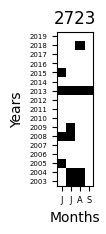

In [220]:
import matplotlib.pyplot as plt
from calendar import month_abbr

plt.rcdefaults()
# Custom x and y axis labels
data = q_shdl[2723][:,6:10][:-1]
# x_labels = [month_abbr[i][0] for i in range(1, 13)]
x_labels = [month_abbr[i][0] for i in range(6, 10)]
y_labels = np.arange(2003, 2020)

# Custom shape
shape = data.shape

# Plotting
plt.figure(figsize=(1.0, 2))
plt.imshow(data, cmap='binary', extent=(0, shape[1], 0, shape[0]), origin='lower')
# plt.colorbar(label='Value')  # Add colorbar with label
plt.xticks(np.arange(0.5, shape[1]), x_labels, fontsize =6)  # Custom x-axis labels
plt.yticks(np.arange(0.5, shape[0]), y_labels, fontsize =5)  # Custom y-axis labels
plt.title('2723')
plt.xlabel('Months')
plt.ylabel('Years')
plt.grid(False)  # Turn off grid lines
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from calendar import month_abbr

# Given dictionary containing 2D array data
dict_data = {k: q_shdl[k] for k in list(q_shdl.keys())[525:549]}
# Custom x and y axis labels
x_labels = [month_abbr[i][0] for i in range(6, 10)]  # First letter of each month
y_labels = np.arange(2003, 2020)

# Create subplots
num_plots = len(dict_data)
num_cols = 15
num_rows = num_plots // num_cols + (1 if num_plots % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.0*num_cols, 3.0*num_rows),sharex=True, sharey=True) #, figsize=(0.7*num_cols, 1.0*num_rows)

# Plot each data in the dictionary
for ax, (title, data) in zip(axes.flat, dict_data.items()):
    data = data[:,6:10][:-1]
    ax.imshow(data, cmap='binary', extent=(0, data.shape[1], 0, data.shape[0]), origin='lower')
    ax.set_title(sub_grids[sub_grids['Cell_ID']==title].iloc[0,3],fontsize=14)
    ax.set_xticks(np.arange(0.5, data.shape[1]), x_labels, fontsize=10)  # Custom x-axis labels
    ax.set_yticks(np.arange(0.5, data.shape[0]),y_labels, fontsize =10)  # Custom y-axis labels
    ax.grid(False)  # Turn off grid lines

# Adjust layout
plt.subplots_adjust(hspace=0.01)
plt.tight_layout()
plt.savefig('sheduling_sub_525_549.png', format='png',dpi=1000)
plt.show()


In [ ]:
## ploting recharge rate
## subbasin vs time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from calendar import month_abbr

# Given dictionary containing 2D array data
dict_data = {k: q_shdl[k] for k in list(q_all.keys())[0:100]}

plot_data2 = np.array([q_all[k].flatten() for k in list(q_all.keys())[0:100]])

x_labels = pd.date_range('01-01-2003','01-12-2021', freq='M')
y_labels = list(q_shdl.keys())[0:100]

# Custom shape
shape = plot_data2.shape
norm = colors.Normalize(vmin=plot_data2.min(), vmax=plot_data2.max())

# Plotting
plt.figure(figsize=(20, 10))
plt.imshow(plot_data2, cmap='RdYlBu', extent=(0, shape[1], 0, shape[0]), origin='lower',vmax =10000,aspect='auto')
plt.colorbar(label='Injection rate $(m^3/day)$',shrink=1.0,  )  # Add colorbar with label
plt.xticks(np.arange(0.5, shape[1]), x_labels, fontsize =6, rotation=90)  # Custom x-axis labels
plt.yticks(np.arange(0.5, shape[0]), y_labels, fontsize =5)  # Custom y-axis labels
# plt.title('2723')
plt.xlabel('Date')
plt.ylabel('Subbasin')
plt.grid(False)  # Turn off grid lines
# plt.subplots_adjust(right=0.8)
# plt.tight_layout()
plt.show()


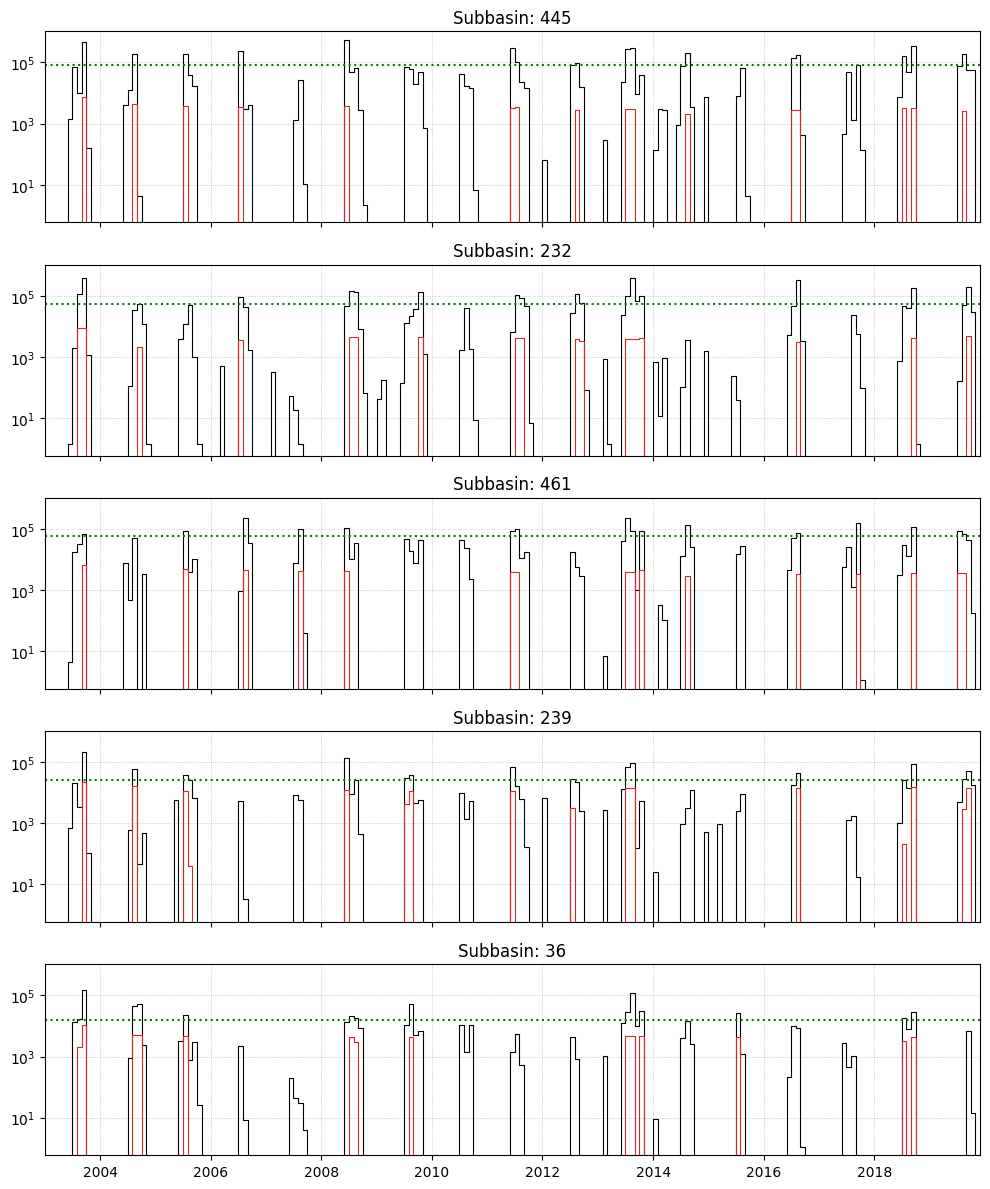

In [29]:
## plotting for best subbasins
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
# subs = [169,386,855,469,100,215,468,303]
subs = [445,232,461,239,36]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True, sharey=True)


for i, sub in enumerate(subs):
    runoff = hru_data[hru_data['SUB']==sub]['SURQ_CNT_m3d'].values[:-12]
    ir_df  =pd.read_csv('injection_rates_MAR_Betwa.csv')
    inj_rate = ir_df[str(sub)].values[:-12]
    per_depend_df = pd.read_csv('25perdependabl_runoff.csv')
    per_depend = per_depend_df[per_depend_df['Subbasin']==sub].iloc[0,-1]

    x_values = pd.to_datetime(ir_df['Date'].iloc[:-12])


    axes[i].step(x_values, runoff, where='post',color='k',linewidth = 0.8 ,label = 'Runoff')
    axes[i].step(x_values, inj_rate, where='post',color='tab:red',linewidth = 0.8 ,label = 'Injection rate ')
    axes[i].plot(x_values, np.ones(len(x_values))*per_depend, color='green', linestyle = ':', label = '75% dependable flow')
    # axes[i].legend()
    axes[i].grid(which='both', linestyle=':', linewidth=0.5)
    axes[i].set_yscale('log')
    axes[i].set_title('Subbasin: '+str(sub))

    # axes[i].set_ylim(0.0, 1e6)
    axes[i].set_xlim(min(x_values), max(x_values))
plt.tight_layout()
plt.savefig('Sample_TS_MAR.png', format='png', dpi = 1000)


In [34]:
suit_data =pd.read_csv('MAR_suitability.csv')
min_max = pd.read_csv('min_max_recharge.csv')
min_max['Subbasin'] = min_max['Sub']
mplot_data = pd.merge(suit_data, min_max, on= 'Subbasin')

In [ ]:
## plot all TS for classified subs
import os
import matplotlib.pyplot as plt

for sub in suit_data['Subbasin']:


    plot_path = os.getcwd()+'/plots/All_subs/'+suit_data[suit_data['Subbasin']==sub].iloc[0,-4]+'/'
    if not os.path.exists(plot_path):
        # If the folder doesn't exist, create it
        os.makedirs(plot_path)
        print(f"Folder '{plot_path}' created successfully.")
    else:
        # print(f"Folder '{plot_path}' already exists.")
        pass

    # for sub in sub_grids.iloc[:,3].values:
    try:
        runoff = hru_data[hru_data['SUB']==sub]['SURQ_CNT_m3d'].values
        ir_df  =pd.read_csv('injection_rates_MAR_Betwa.csv')
        inj_rate = ir_df[str(sub)].values
        per_depend_df = pd.read_csv('25perdependabl_runoff.csv')
        per_depend = per_depend_df[per_depend_df['Subbasin']==sub].iloc[0,-1]
    except KeyError as e:
        continue

    x_values = pd.to_datetime(ir_df['Date'])

    plt.figure(figsize=(10,2))
    plt.step(x_values, runoff, where='post',color='k', label = 'Runoff ',linewidth = 1.0)
    plt.step(x_values, inj_rate, where='post',color='tab:red' ,label = 'Injection rate ',linewidth = 1.0)
    plt.plot(x_values, np.ones(len(x_values))*per_depend, color='green', linestyle = ':', label = '75% dependable flow')
    plt.yscale('log')
    plt.xlim(min(x_values), max(x_values))
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('Date')
    plt.ylabel('Value $ (m^3/day)$')
    plt.title(str(sub))
    plt.tight_layout()
    plt.savefig(plot_path+str(sub)+'.png', format='png', dpi =300)
    # plt.legend()

    plt.grid(True)

In [ ]:
### code for suitbility in ArcGIS Raster calculator
def MAR(x):
    if x<0.12848:
        y = 'Poor'
    elif x<0.21206:
        y = 'Moderate'
    elif x<0.32629:
        y = 'Fair'
    elif x<0.53386:
        y = 'Good'
    else:
        y = 'Excellent'
    return y

In [44]:
import pandas as pd
suit_data =pd.read_csv('MAR_suitability.csv')
suit_data['Area(km)'] = suit_data['Area']*0.01

<Figure size 1000x200 with 0 Axes>

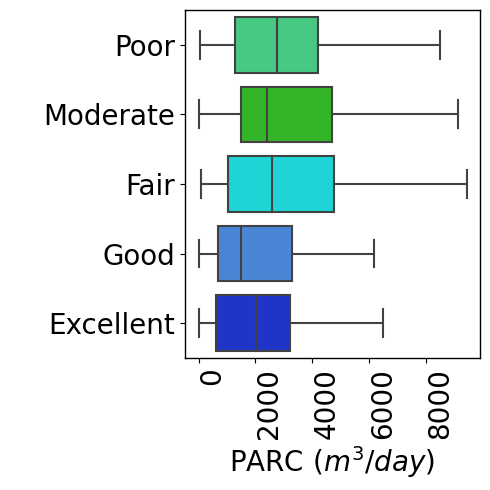

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,2))
pallete = sns.color_palette(["#31DE82","#20CC10","#00F2F2","#3283ED","#0220E3"])
order = ['Poor', 'Moderate','Fair' , 'Good', 'Excellent']
sns.catplot(data=suit_data, y="MAR_suitab",x = 'Year18', kind="box", palette=pallete, width=.8, showfliers=False, order=order)
# plt.gca().invert_yaxis()
# plt.gca().xaxis.tick_top()

# Add borders
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.xticks(rotation=90, ha='left', fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('PARC $(m^3/day)$', fontsize=20)
plt.ylabel('  ', fontsize=20)
# plt.title('Histogram of Categorical Data', fontsize=16)
# Adjust bar width and height
# for bar in plt.gca().patches:
#     bar.set_height(60)  # Adjust bar height
#     bar.set_width(80)   # Adjust bar width
plt.tight_layout()
plt.savefig('suitability_PARC_box.png', format= 'png', dpi = 1000)
plt.grid(False)

<Figure size 1000x200 with 0 Axes>

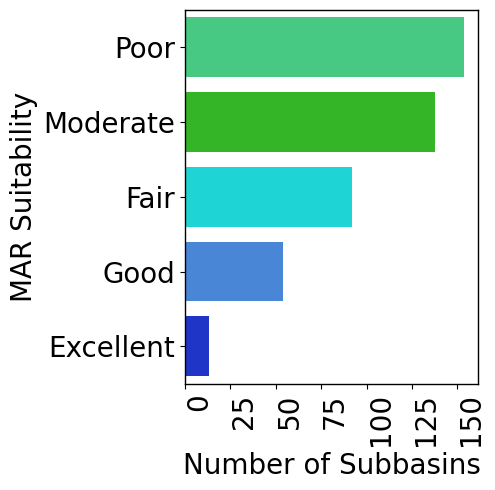

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,2))
pallete = sns.color_palette(["#31DE82","#20CC10","#00F2F2","#3283ED","#0220E3"])
sns.catplot(data=suit_data, y="MAR_suitab", kind="count", palette=pallete, width=.8, order=order)
# plt.gca().invert_yaxis()
# plt.gca().xaxis.tick_top()

# Add borders
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.xticks(rotation=90, ha='left', fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Number of Subbasins', fontsize=20)
plt.ylabel('MAR Suitability', fontsize=20)
# plt.title('Histogram of Categorical Data', fontsize=16)
# Adjust bar width and height
# for bar in plt.gca().patches:
#     bar.set_height(60)  # Adjust bar height
#     bar.set_width(80)   # Adjust bar width
plt.tight_layout()
plt.savefig('suitability_count.png', format= 'png', dpi = 1000)
plt.grid(False)